# Data Gathering
1. Get data from the file `twitter-archive-enhanced.csv`
2. Get data from the url `https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv`
3. Get data for the tweets obtained in first step, from Twitter API using tweepy.

In [1]:
import pandas as pd

### Getting data from file

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Getting data from URL and saving to file

In [3]:
import requests
import os

In [4]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
dirname = 'image-predictions'
if dirname not in os.listdir():
    os.mkdir(dirname)
    
with open(dirname+'/image-predictions.tsv','wb+') as file:
    file.write(response.content)

In [6]:
pred_file = dirname+'/image-predictions.tsv'
img_preds = pd.read_csv(pred_file,sep='\t')
img_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Getting data from Twitter API using Tweepy

In [7]:
import tweepy
import json

In [9]:
def readline_woLine(file):
    return file.readline().strip('\n')

In [10]:
# Get credentials from file
with open('twitter_authentication.txt','r') as file:
    consumer_key = readline_woLine(file)
    consumer_secret = readline_woLine(file)
    access_token = readline_woLine(file)
    access_token_secret = readline_woLine(file)

In [11]:
# Test API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

World is angry and stressed, Gallup report says https://t.co/ywJj7mGEca
Srinivas gives the traditional Kalamkari a new look. His subject matter now is marine life. 
https://t.co/KbxsnmFbw6
Packing your bags to catch an F1 race? Here's how you can make these your holiday destinations as well! #Formula1… https://t.co/YVf73j0jtD
RT @TheHinduMag: ‘My best collaborators are women,’ Gagandeep Kang, the first Indian woman Fellow of the Royal Society, tells @neutranino —…
“Today’s meetings in Samastipur (Bihar), Balasore (Orissa) &amp; Sangamner (Maharashta) will run late," twteeted… https://t.co/QUOJc1noJd
Anna Delvey: The trial of New York's fake heiress https://t.co/Vt0whDLXUz
RT @TheHinduMag: Thirty years apart, Salim Langde Pe Mat Ro and #GullyBoy are 'before' and 'after' images — https://t.co/Sx9qhNchL3 https:/…
After programmes in Uttar Pradesh, I’m speaking at a rally in Sidhi, Madhya Pradesh. Watch. https://t.co/N6XxuFZuJ0
माता- पिता 🤱🏻🙋🏻‍♂
स्वास्थ्य अफ़सर - स्वास्थ्यकर्मी 👩🏻‍⚕👨🏻‍🔬
मह

### Get data for further analysis

In [12]:
# Store list of Tweet IDs from twitter archive
tweet_id_list = list(twitter_archive.tweet_id)

In [13]:
# Retrieve 100 tweets per call to API and dump in tweets_json file
number_of_tweets = len(tweet_id_list)-1
with open('tweet_json.txt','w+',encoding='utf-8') as file:
    file.write('[')
    for i in range(0,len(tweet_id_list),100):
        id_list_100 = tweet_id_list[i:i+100]
        status_lookup_100 = api.statuses_lookup(id_list_100)
        
        for j,status in enumerate(status_lookup_100):
            json.dump(status._json,file)
            if((i+j)<number_of_tweets):
                    file.write(',')
    file.write(']')

In [14]:
# Read the tweets into Dataframe
tweets = pd.read_json('tweet_json.txt')

In [15]:
# Save a copy
tweets_copy = tweets.copy()

In [16]:
# Retain only required columns for further analysis
tweets_req = tweets_copy[['id','favorite_count','retweet_count','in_reply_to_status_id_str','geo']]

In [17]:
print('Number of tweets (no retweets) among the dataframe {0}/{1}'.format(sum(tweets_req.in_reply_to_status_id_str.isnull()),len(tweets_req)))

Number of tweets (no retweets) among the dataframe 2260/2337


# Assess Data

Visually data from the 3 sources
1. twitter_archive
2. img_preds
3. tweets_req

In [18]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### Multiple stages of dog maintained in separate columns, can be contained in a single column, as a list.

In [19]:
img_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### No tidiness issues in the above data

In [20]:
tweets_req.head()

,id,favorite_count,retweet_count,in_reply_to_status_id_str,geo
0,876484053909872640,18277,2322,NaN,NaN
1,886366144734445568,20597,3091,NaN,NaN
2,877611172832227328,0,78,NaN,NaN
3,888078434458587136,21160,3365,NaN,NaN
4,891689557279858688,40934,8352,NaN,NaN


##### No tidiness issues in the above data

#### From the above 3 sources, tweet_id (id in tweet_req) is a common column that can be merged on.

In [21]:
twitter_archive_copy = twitter_archive.copy()

In [22]:
twitter_archive_copy[twitter_archive_copy.in_reply_to_status_id.notnull()]
# Seems like in_reply_to_status_id and in_reply_to_user_id columns are NaN unless the tweet is a retweet. Remove retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [23]:
print(twitter_archive_copy.head().timestamp)
timestamp_length = list(map(len,twitter_archive_copy.timestamp))
# Mostly seems to contain same format of timestamp
time_diff_format = False
for i in timestamp_length:
    if(i!=25):
        time_diff_format = True
        print('There exists a timestamp with different format')
        break
if(not(time_diff_format)):
    print('All timestamps are of similar format and length')
# Timestamp can be left untouched

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object
All timestamps are of similar format and length


In [24]:
# Next column to check is source
twitter_archive_copy.head().source

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [27]:
# Check for issues or refinements that can be done in source column.
twitter_archive_copy.iloc[0].squeeze().source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [25]:
# Function to check if all source data is contained within a tags
import re
def check_for_sourceFormatting(text):
    return len(re.findall('<a.+</a>',text))>0

In [26]:
# Check if all source data is contained within a tags
source_contains_aTag = list(map(check_for_sourceFormatting,twitter_archive_copy.source))
contains_a_only = True
for i in source_contains_aTag:
    if(not(i)):
        contains_a_only = False
        print('Source might contain other than <a> tags')
        break
if((contains_a_only)):
    print('Source has <a> tags only')  

Source has <a> tags only


In [28]:
# Let's remove the a tags and keep only content in the source column
from bs4 import BeautifulSoup

def return_a_content(text):
    soup = BeautifulSoup(text,'html.parser')
    return soup.a.text

In [29]:
twitter_archive_copy['source_content'] = twitter_archive_copy.source.apply(lambda x:return_a_content(x))
# source_content contains the content between a tags
twitter_archive_copy[['source','source_content']].head()
# source column can now be dropped

,source,source_content
0,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
1,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
2,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
3,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
4,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone


In [30]:
# Check the next column, text
twitter_archive_copy.head(1).squeeze().text

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [31]:
# Text contains a lot of information, like Name, Phase and Rating of the dog.
# Let's look at them one by one

# Name 
list(twitter_archive_copy.head(1000).name)
# Some of the rows have None, as the name might not be mentioned in the tweet. It is a valid scenario.
# However, a value of "a" or "an" or words instead of nouns, is invalid and
# happens when text parsing is based on few sentence constructs.

# This can be solved by extracting the names/nouns from text and correcting those rows.

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 

In [34]:
# Let's take a look at ratings now
twitter_archive_copy[twitter_archive_copy.rating_denominator!=10][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


In [35]:
# Those were some weird fractions for ratings, let's check out all the fractions in the text
twitter_archive_copy['rating_new'] = twitter_archive.text.str.findall('((?:\d+\.)?\d+)\/(\d+)')

In [36]:
twitter_archive_copy[twitter_archive_copy.rating_denominator!=10][['tweet_id','rating_new','rating_numerator','rating_denominator']]

,tweet_id,rating_new,rating_numerator,rating_denominator
313,835246439529840640,"[(960, 00), (13, 10)]",960,0
342,832088576586297345,"[(11, 15)]",11,15
433,820690176645140481,"[(84, 70)]",84,70
516,810984652412424192,"[(24, 7)]",24,7
784,775096608509886464,"[(9, 11), (14, 10)]",9,11
902,758467244762497024,"[(165, 150)]",165,150
1068,740373189193256964,"[(9, 11), (14, 10)]",9,11
1120,731156023742988288,"[(204, 170)]",204,170
1165,722974582966214656,"[(4, 20), (13, 10)]",4,20
1202,716439118184652801,"[(50, 50), (11, 10)]",50,50


In [37]:
# Some of them don't seem to have a rating, so we can assign them a None
print(twitter_archive_copy.query('tweet_id==810984652412424192').squeeze().text)
# Some of them are not about a single dog, so we can drop these rows
print(twitter_archive_copy.query('tweet_id==675853064436391936').squeeze().text)

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw


In [38]:
# For those that have ratings and have been assigned a wrong number, pick the rating with denominator of 10
print(twitter_archive_copy.query('tweet_id==666287406224695296').squeeze().text)

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [39]:
# Dog phases are in multiple columns, that's troublesome
twitter_archive_copy[(twitter_archive_copy.doggo!='None')|(twitter_archive_copy.pupper!='None')|(twitter_archive_copy.puppo!='None')
     |(twitter_archive_copy.floofer!='None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_content,rating_new
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,Twitter for iPhone,"[(14, 10)]"
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo,Twitter for iPhone,"[(13, 10)]"
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo,Twitter for iPhone,"[(13, 10)]"
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None,Twitter for iPhone,"[(12, 10)]"
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None,Twitter for iPhone,"[(12, 10)]"
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None,Twitter for iPhone,"[(13, 10)]"
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None,Twitter for iPhone,"[(12, 10)]"
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None,Twitter for iPhone,"[(14, 10)]"
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo,Twitter for iPhone,"[(13, 10)]"
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None,Twitter for iPhone,"[(14, 10)]"


In [40]:
# Is it possible for a dog to be both doggo and pupper at once?
print(twitter_archive_copy[(twitter_archive_copy.doggo!='None') & (twitter_archive_copy.pupper!='None')].head(1).squeeze().text)

twitter_archive_copy[(twitter_archive_copy.doggo!='None') & (twitter_archive_copy.pupper!='None')].head().text

This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7


460    This is Dido. She's playing the lead role in "...
531    Here we have Burke (pupper) and Dexter (doggo)...
565    Like doggo, like pupper version 2. Both 11/10 ...
575    This is Bones. He's being haunted by another d...
705    This is Pinot. He's a sophisticated doggo. You...
Name: text, dtype: object

In [41]:
# Function to find phase count
def find_phase_count(row):
    sum=0
    for i in ['doggo','pupper','puppo','floofer']:
        if (row[i]==i):
            sum+=1
    return sum

In [42]:
# Find count and assign it to a column
twitter_archive_copy['phase_count'] = twitter_archive_copy.apply(lambda row:find_phase_count(row),axis=1)

In [43]:
# How many records have this ambiguity?
len(twitter_archive_copy[twitter_archive_copy.phase_count>1])

14

In [44]:
# For these 14 records, maintain a list of the stages as a single column.
twitter_archive_copy[twitter_archive_copy.phase_count>1][['text','doggo','pupper','puppo','floofer']]

,text,doggo,pupper,puppo,floofer
191,Here's a puppo participating in the #ScienceMa...,doggo,None,puppo,None
200,"At first I thought this was a shy doggo, but i...",doggo,None,None,floofer
460,"This is Dido. She's playing the lead role in ""...",doggo,pupper,None,None
531,Here we have Burke (pupper) and Dexter (doggo)...,doggo,pupper,None,None
565,"Like doggo, like pupper version 2. Both 11/10 ...",doggo,pupper,None,None
575,This is Bones. He's being haunted by another d...,doggo,pupper,None,None
705,This is Pinot. He's a sophisticated doggo. You...,doggo,pupper,None,None
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",doggo,pupper,None,None
778,"RT @dog_rates: Like father (doggo), like son (...",doggo,pupper,None,None
822,RT @dog_rates: This is just downright precious...,doggo,pupper,None,None


In [45]:
# Check next column, expanded_urls
twitter_archive_copy.head().expanded_urls

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
Name: expanded_urls, dtype: object

In [46]:
import math

p_domain_list = re.compile('(\w+)\.com')

def get_domain_list(text):
    domain_list = []
    if(type(text) is str):
        for value in list(set(re.findall('\w+\.com',text))):
            domain_list.append(p_domain_list.match(value).group(1))
    return domain_list

In [47]:
get_domain_list(twitter_archive_copy.head(1).squeeze().expanded_urls)

['twitter']

In [48]:
twitter_archive_copy['domains'] = twitter_archive_copy.expanded_urls.apply(lambda x:get_domain_list(x))

In [49]:
twitter_archive_copy.columns.values

array(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'source_content',
       'rating_new', 'phase_count', 'domains'], dtype=object)

In [50]:
# Next are the rating columns, which as analysed earlier, have some erroneous data which needs to be corrected
# Based on either the number of fractions associated with the tweet or whether the denominator is 10.

In [51]:
# Name, similarly, needs to be parsed from the text and updated for tweets that have been assigned non-noun names

In [52]:
# Check if jpg_url exists, just so we analyse only records that have images associated

In [53]:
# Out of the predictions, maintain a single column for the best prediction and its corresponding confidence.

### Data Quality Issues
1. Consistency - The `in_reply_to_status_id` and `in_reply_to_user_id` columns are NaN unless the tweet is a retweet. Remove retweets
2. Accuracy - For the Name column, some of the rows have None, as the name might not be mentioned in the tweet. It is a valid scenario. However, a value of "a" or "an" or words instead of nouns, is invalid and happens when text parsing is based on few sentence constructs. This can be solved by converting such words to 'None'.
3. Accuracy - For those that have ratings and have a denominator other than 10, pick the rating with denominator of 10 if it exists
5. Completeness - Maintain a column to maintain the list of domains associated with the tweet.
6. Validity - For records in which there hasn't been a dog prediction, with at least 0.1 accuracy, mark as inconclusive.
7. Consistency - Only retain records that talk about a single dog, so that the analytics and visualizations can revolve around that accordingly.
8. Consistency - For the sake of predictions, maintain only the records that have images associated. (Already achieved by performing inner join between data sources.)
9. Completeness - One-hot-encode the domains column, so that there's one column for each unique domain that could possibly be associated with
    the tweet ('twitter.com', 'gofundme.com', 'petfinder.com','blastingnews.com','loveyourmelon.com','facebook.com', 'patreon.com')
1. `geo` column has no entries
2. `source, retweet_status_id, retweeted_status_user_id, retweeted_status_timestamp` columns aren't required for analysis
3. Extract only content from the `source` column and maintain in a new column called source_content
4. Out of the prediction columns, maintain a single column for the best prediction and its corresponding confidence.
5. Drop intermediate columns created for the creation of columns to be maintained in final dataframe.

### Tidiness Issues
1. Merge the 3 dataframes on tweet_id (id from tweet_req) column.
2. Maintain one column for dog stage, a list consisting of relevant dog stages

# Data Cleaning

For each point mentioned in the Data Quality and Tidiness Issues section, write code to clean and format data accordingly.

In [54]:
# Tidiness Issue 1
# Combine data from all the data sources
twts = pd.merge(twitter_archive_copy,img_preds,on='tweet_id',how='inner')
twts = pd.merge(twts,tweets_req,left_on='tweet_id',right_on='id',how='inner').drop(columns=['id'])

In [55]:
# What are the columns in the merged Dataframe ?
twts.columns.values

array(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'source_content',
       'rating_new', 'phase_count', 'domains', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count',
       'in_reply_to_status_id_str', 'geo'], dtype=object)

In [56]:
# Check out few records
twts.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,in_reply_to_status_id_str,geo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,37602,8199,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,32317,6063,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,24350,4011,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,40934,8352,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39136,9051,NaN,NaN


In [57]:
twts_copy = twts.copy()

##### DEFINE -  Consistency - The in_reply_to_status_id and in_reply_to_user_id columns are NaN unless the tweet is a retweet. Remove retweets

In [58]:
# Code
twts_copy = twts_copy[twts_copy.in_reply_to_status_id.isnull()]
twts_copy = twts_copy.reset_index().drop(columns = ['index'])

In [59]:
#Test
sum(twts_copy.in_reply_to_status_id.notnull())

0

In [60]:
# Names column
names = twts_copy.name.unique()
names.sort()

In [61]:
names

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe',
       'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella',
       'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb',
       'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden',
       'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely',
       'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue',
       'B

##### DEFINE - Accuracy - For the Name column, some of the rows have None, as the name might not be mentioned in the tweet. It is a valid scenario. However, a value of "a" or "an" or words instead of nouns, is invalid and happens when text parsing is based on few sentence constructs. This can be solved by extracting the names/nouns from text and correcting those rows. From the list above, it's clear that the names that start with a lowercase letter are the culprits. Let's first turn them to 'None'

In [62]:
# Code
twts_copy['name'] = twts_copy.name.apply(lambda x:'None' if x.lower()==x else x)

In [63]:
# Test
names = twts_copy.name.unique()
names.sort()
names

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe',
       'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella',
       'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb',
       'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden',
       'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely',
       'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue',
       'B

In [64]:
# Check rows that have a denominator other than 10
for value in twts_copy[twts_copy.rating_denominator!=10].text:
    print(value)

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
From

##### DEFINE - Some of these records have multiple fractions, one of them being the rating and the other a random indicator. For such records, choose the rating, by selecting the one with denominator 10. If there's only a single fraction, and the denominator is on the higher side, say above 20, it's likely that the tweet is about multiple dogs. Leave that to be cleaned later. If the tweet does not have any rating with denom greater than or equal to 10, make it 'None'

In [65]:
# Code

twts_copy['rating_new'] = twts_copy.text.str.findall('((?:\d+\.)?\d+)\/(\d+)')
            
def find_rating(ratings):
    for rating in ratings:
        if int(rating[1])==10:
            return rating
    for rating in ratings:
        if(int(rating[1])>=20):
            return rating
    return 'None'
    
twts_copy['rating_new'] = twts_copy.rating_new.apply(lambda x:find_rating(x))

In [66]:
# Test
twts_copy.rating_new.unique()

array([('13', '10'), ('12', '10'), ('14', '10'), ('13.5', '10'),
       ('11', '10'), ('10', '10'), ('6', '10'), ('15', '10'), ('0', '10'),
       ('84', '70'), 'None', ('9.75', '10'), ('5', '10'), ('11.27', '10'),
       ('3', '10'), ('7', '10'), ('8', '10'), ('9', '10'), ('4', '10'),
       ('165', '150'), ('1776', '10'), ('204', '170'), ('99', '90'),
       ('80', '80'), ('45', '50'), ('60', '50'), ('44', '40'),
       ('121', '110'), ('11.26', '10'), ('2', '10'), ('144', '120'),
       ('88', '80'), ('1', '10'), ('420', '10')], dtype=object)

In [67]:
# Convert the new rating to rating_numerator and denominator
# Code
def create_fraction(fraction, num):
    if(fraction!='None'):
        if(num):
            return float(fraction[0])
        else:
            return float(fraction[1])
    return 0

twts_copy['rating_new_numerator'] = twts_copy.rating_new.apply(lambda x:create_fraction(x,True))
twts_copy['rating_new_denominator'] = twts_copy.rating_new.apply(lambda x:create_fraction(x,False))

In [68]:
# Test
twts_copy[twts_copy.rating_new_denominator>10][['rating_new','rating_new_numerator','rating_new_denominator']]

,rating_new,rating_new_numerator,rating_new_denominator
336,"(84, 70)",84.0,70.0
724,"(165, 150)",165.0,150.0
911,"(204, 170)",204.0,170.0
1008,"(99, 90)",99.0,90.0
1033,"(80, 80)",80.0,80.0
1051,"(45, 50)",45.0,50.0
1115,"(60, 50)",60.0,50.0
1190,"(44, 40)",44.0,40.0
1358,"(121, 110)",121.0,110.0
1489,"(144, 120)",144.0,120.0


##### DEFINE - Tidiness Issue 2 - Maintain one column for dog stage, one among doggo/pupper/puppo/floofer. Get count of phases for records with multiple phases. Since only 4 out of the 11 records are valid records according to multiple dogs scenario. (Consistency - Only retain records that talk about a single dog, so that the analytics and visualizations can revolve around that accordingly.), let's drop all records with multiple stages listed.

In [69]:
twts_copy['phase_count'] = twts_copy.apply(lambda row:find_phase_count(row),axis=1)

print(len(twts_copy[twts_copy.phase_count>1]))

print(twts_copy[twts_copy.phase_count>1][['tweet_id','text','doggo','pupper','puppo','floofer']])

for twt in twts_copy[twts_copy.phase_count>1].text:
    print(twt)

12
               tweet_id                                               text  \
149  855851453814013952  Here's a puppo participating in the #ScienceMa...   
155  854010172552949760  At first I thought this was a shy doggo, but i...   
357  817777686764523521  This is Dido. She's playing the lead role in "...   
420  808106460588765185  Here we have Burke (pupper) and Dexter (doggo)...   
453  801115127852503040  This is Bones. He's being haunted by another d...   
555  785639753186217984  This is Pinot. He's a sophisticated doggo. You...   
616  775898661951791106  RT @dog_rates: Like father (doggo), like son (...   
655  770093767776997377  RT @dog_rates: This is just downright precious...   
712  759793422261743616  Meet Maggie &amp; Lila. Maggie is the doggo, L...   
769  751583847268179968  Please stop sending it pictures that don't eve...   
858  741067306818797568  This is just downright precious af. 12/10 for ...   
904  733109485275860992  Like father (doggo), like son (puppe

In [70]:
# Code
twts_copy.drop(twts_copy[twts_copy.phase_count>1].index, inplace=True)
twts_copy = twts_copy.reset_index().drop(columns = ['index'])

In [71]:
# Test
twts_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 38 columns):
tweet_id                      2030 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2030 non-null object
source                        2030 non-null object
text                          2030 non-null object
retweeted_status_id           73 non-null float64
retweeted_status_user_id      73 non-null float64
retweeted_status_timestamp    73 non-null object
expanded_urls                 2030 non-null object
rating_numerator              2030 non-null int64
rating_denominator            2030 non-null int64
name                          2030 non-null object
doggo                         2030 non-null object
floofer                       2030 non-null object
pupper                        2030 non-null object
puppo                         2030 non-null object
source_content                2030 no

In [72]:
# Doggo, Pupper and Puppo columns to be combined now
# Code
def phase(row):
    if row['doggo']=='doggo':
        return 'doggo' 
    elif row['pupper']=='pupper':
        return 'pupper'
    elif row['puppo']=='puppo':
        return 'puppo'
    elif row['floofer']=='floofer':
        return 'floofer'
    
twts_copy['phase'] = twts_copy.apply(lambda row:phase(row),axis=1)

In [73]:
# Test
twts_copy['phase'].unique()

array([None, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [74]:
# Tidiness : Remove the stage columns
# Code
twts_copy.drop(columns = ['doggo','pupper','puppo','floofer'],inplace=True)
# Test
twts_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 35 columns):
tweet_id                      2030 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2030 non-null object
source                        2030 non-null object
text                          2030 non-null object
retweeted_status_id           73 non-null float64
retweeted_status_user_id      73 non-null float64
retweeted_status_timestamp    73 non-null object
expanded_urls                 2030 non-null object
rating_numerator              2030 non-null int64
rating_denominator            2030 non-null int64
name                          2030 non-null object
source_content                2030 non-null object
rating_new                    2030 non-null object
phase_count                   2030 non-null int64
domains                       2030 non-null object
jpg_url                       2030 non

##### DEFINE - Maintain list of domains associated with the tweet. Get domain list.

In [75]:
# Code
p_domain_list = re.compile('(\w+)\.com')

def get_domain_list(text):
    domain_list = []
    for value in list(set(re.findall('\w+\.com',text))):
        domain_list.append(p_domain_list.match(value).group(1))
    return domain_list

twts_copy['domain_list'] = twts_copy.expanded_urls.apply(lambda x:get_domain_list(x))

In [76]:
# Test
twts_copy[twts_copy.domain_list.map(len)>1].domain_list

6           [twitter, gofundme]
26          [twitter, gofundme]
64          [twitter, gofundme]
82          [twitter, gofundme]
93          [twitter, gofundme]
103         [twitter, gofundme]
121         [twitter, gofundme]
130         [twitter, gofundme]
144         [twitter, gofundme]
157         [twitter, gofundme]
181         [twitter, gofundme]
184        [twitter, petfinder]
192         [twitter, gofundme]
201         [twitter, gofundme]
211         [twitter, gofundme]
236         [twitter, gofundme]
260        [twitter, petfinder]
264         [twitter, gofundme]
272         [twitter, gofundme]
300     [blastingnews, twitter]
306         [twitter, gofundme]
336    [twitter, loveyourmelon]
338         [twitter, gofundme]
357         [twitter, gofundme]
369         [twitter, gofundme]
396         [twitter, facebook]
403         [twitter, gofundme]
581          [twitter, patreon]
Name: domain_list, dtype: object

##### DEFINE - Completeness - One-hot-encode the domains column, so that there's one column for each unique domain that could possibly be associated with the tweet ('twitter.com', 'gofundme.com', 'petfinder.com','blastingnews.com','loveyourmelon.com','facebook.com', 'patreon.com')

In [77]:
# https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f
# Identify the distinct domains

# Code
domain_set = set()

for twt in twts_copy.domain_list:
    for domain in twt:
        domain_set.add(domain)
        
domain_set

{'blastingnews',
 'facebook',
 'gofundme',
 'loveyourmelon',
 'patreon',
 'petfinder',
 'twitter'}

In [78]:
# For each of the domains, if the tweet consists a reference, enter 1 else 0
# Code
for domain in domain_set:
    twts_copy[domain] = twts_copy.domain_list.apply(lambda x: 1 if domain in x else 0)

In [79]:
# Test
for domain in domain_set:
    print(domain, sum(twts_copy[domain]))

blastingnews 1
gofundme 22
twitter 2030
facebook 1
petfinder 2
loveyourmelon 1
patreon 1


###### DEFINE - Validity - For records in which there hasn't been a dog prediction, with at least 0.1 accuracy, mark as inconclusive.

In [80]:
# Code
twts_copy['p1'] = twts_copy.apply(lambda row:'Inconclusive' if row['p1_conf']<=0.1 else row['p1'],axis=1)

In [81]:
# Test
twts_copy[twts_copy.p1_conf<=0.1].p1.unique()

array(['Inconclusive'], dtype=object)

In [82]:
# Test
twts_copy[twts_copy.p1_conf>0.1].p1.unique()

array(['Chihuahua', 'paper_towel', 'basset', 'Chesapeake_Bay_retriever',
       'Appenzeller', 'Pomeranian', 'Irish_terrier', 'Pembroke',
       'Samoyed', 'French_bulldog', 'golden_retriever', 'whippet',
       'Siberian_husky', 'limousine', 'Mexican_hairless', 'kuvasz',
       'convertible', 'pug', 'Blenheim_spaniel', 'Labrador_retriever',
       'malamute', 'Italian_greyhound', 'chow', 'German_shepherd',
       'Doberman', 'Eskimo_dog', 'web_site', 'Weimaraner', 'Saluki',
       'tusker', 'street_sign', 'miniature_pinscher',
       'German_short-haired_pointer', 'English_springer', 'tricycle',
       'tabby', 'vizsla', 'Irish_setter', 'bloodhound',
       'Bernese_mountain_dog', 'West_Highland_white_terrier',
       'cocker_spaniel', 'flat-coated_retriever', 'Cardigan',
       'Newfoundland', 'basketball', 'Shetland_sheepdog', 'komondor',
       'kelpie', 'home_theater', 'Greater_Swiss_Mountain_dog',
       'comic_book', 'laptop', 'Border_collie', 'pole', 'bull_mastiff',
       'mar

##### DEFINE - Consistency - Only retain records that talk about a single dog, so that the analytics and visualizations can revolve around that accordingly.
##### There are multiple ways, we can say that tweet talks of multiple dogs. 
1. If there are multiple ratings
2. If the rating denomininators are multiples of 10
3. Multiple stages of dog (already handles)
Revisiting these ideas below


In [83]:
# Code
for twt in twts_copy[twts_copy.rating_new.map(len)>1].text:
    print(twt)

for text in twts_copy[twts_copy.rating_new_denominator>10].text:
    print(text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H https://t.

In [84]:
# Drop rows having multiple dogs </3 :'-(
# Code
twts_copy.drop(twts_copy[twts_copy.rating_new_denominator>10].index,inplace=True)
twts_copy = twts_copy.reset_index().drop(columns = ['index'])

In [85]:
# Test
twts_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 43 columns):
tweet_id                      2019 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2019 non-null object
source                        2019 non-null object
text                          2019 non-null object
retweeted_status_id           73 non-null float64
retweeted_status_user_id      73 non-null float64
retweeted_status_timestamp    73 non-null object
expanded_urls                 2019 non-null object
rating_numerator              2019 non-null int64
rating_denominator            2019 non-null int64
name                          2019 non-null object
source_content                2019 non-null object
rating_new                    2019 non-null object
phase_count                   2019 non-null int64
domains                       2019 non-null object
jpg_url                       2019 non

In [86]:
# Final step in Data Cleaning, drop all unnecessary columns, the intermediate ones and the extra ones. Also rename the remaining
# columns appropriately

# Print all columns
print(twts_copy.columns.values)

# Drop 'in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id',
# 'retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','img_num','p2','p2_conf','p2_dog',
# 'p3','p3_conf','p3_dog','in_reply_to_status_id_str','geo','phase_count','domain_of_expanded_urls','domain_list'

['tweet_id' 'in_reply_to_status_id' 'in_reply_to_user_id' 'timestamp'
 'source' 'text' 'retweeted_status_id' 'retweeted_status_user_id'
 'retweeted_status_timestamp' 'expanded_urls' 'rating_numerator'
 'rating_denominator' 'name' 'source_content' 'rating_new' 'phase_count'
 'domains' 'jpg_url' 'img_num' 'p1' 'p1_conf' 'p1_dog' 'p2' 'p2_conf'
 'p2_dog' 'p3' 'p3_conf' 'p3_dog' 'favorite_count' 'retweet_count'
 'in_reply_to_status_id_str' 'geo' 'rating_new_numerator'
 'rating_new_denominator' 'phase' 'domain_list' 'blastingnews' 'gofundme'
 'twitter' 'facebook' 'petfinder' 'loveyourmelon' 'patreon']


In [87]:
# Code
twts_copy.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id',
'retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','img_num','p2','p2_conf','p2_dog',
'p3','p3_conf','p3_dog','in_reply_to_status_id_str','geo','phase_count','domain_list'],inplace=True)

In [88]:
# Test
twts_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 23 columns):
tweet_id                  2019 non-null int64
timestamp                 2019 non-null object
text                      2019 non-null object
name                      2019 non-null object
source_content            2019 non-null object
rating_new                2019 non-null object
domains                   2019 non-null object
jpg_url                   2019 non-null object
p1                        2019 non-null object
p1_conf                   2019 non-null float64
p1_dog                    2019 non-null bool
favorite_count            2019 non-null int64
retweet_count             2019 non-null int64
rating_new_numerator      2019 non-null float64
rating_new_denominator    2019 non-null float64
phase                     306 non-null object
blastingnews              2019 non-null int64
gofundme                  2019 non-null int64
twitter                   2019 non-null int64
facebo

In [89]:
# Rename columns as required
# Code
twts_copy.rename(columns = {
 'p1': 'probability',
 'p1_conf': 'prob_conf',
 'p1_dog': 'prob_dog',
 'rating_new': 'rating',
 'rating_new_denominator': 'rating_denominator',
 'rating_new_numerator': 'rating_numerator',
 'source_content': 'source'},inplace=True)

In [90]:
# Test
twts_copy.columns.values

array(['tweet_id', 'timestamp', 'text', 'name', 'source', 'rating',
       'domains', 'jpg_url', 'probability', 'prob_conf', 'prob_dog',
       'favorite_count', 'retweet_count', 'rating_numerator',
       'rating_denominator', 'phase', 'blastingnews', 'gofundme',
       'twitter', 'facebook', 'petfinder', 'loveyourmelon', 'patreon'],
      dtype=object)

In [91]:
twts_copy.to_csv('twitter_archive_master.csv',index=False)

In [92]:
twts_copy = pd.read_csv('twitter_archive_master.csv')

In [93]:
twts_copy.head()

,tweet_id,timestamp,text,name,source,rating,domains,jpg_url,probability,prob_conf,...,rating_numerator,rating_denominator,phase,blastingnews,gofundme,twitter,facebook,petfinder,loveyourmelon,patreon
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,Twitter for iPhone,"('13', '10')",['twitter'],https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Inconclusive,0.097049,...,13.0,10.0,NaN,0,0,1,0,0,0,0
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,Twitter for iPhone,"('13', '10')",['twitter'],https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,...,13.0,10.0,NaN,0,0,1,0,0,0,0
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,Twitter for iPhone,"('12', '10')",['twitter'],https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,...,12.0,10.0,NaN,0,0,1,0,0,0,0
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,Twitter for iPhone,"('13', '10')",['twitter'],https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,...,13.0,10.0,NaN,0,0,1,0,0,0,0
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,Twitter for iPhone,"('12', '10')",['twitter'],https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,...,12.0,10.0,NaN,0,0,1,0,0,0,0


In [94]:
twts_copy.columns.values

array(['tweet_id', 'timestamp', 'text', 'name', 'source', 'rating',
       'domains', 'jpg_url', 'probability', 'prob_conf', 'prob_dog',
       'favorite_count', 'retweet_count', 'rating_numerator',
       'rating_denominator', 'phase', 'blastingnews', 'gofundme',
       'twitter', 'facebook', 'petfinder', 'loveyourmelon', 'patreon'],
      dtype=object)

# Data Analytics and Visualization

Analytics : 

1. Which is the most common breed to be tweeted about?
2. Which breed is favorited and retweeted the most?
3. Which breed has got the highest ratings?
5. Which are the breeds commonly associated with floofer?
6. What is the most common source for the tweets?
7. Apart from twitter, which is the most popular platform endorsed along the tweets?

Visualization : 

1. Breed vs Average Rating

In [95]:
# Copy twts_copy to another variable
tweets = twts_copy.copy()

In [96]:
# Which is the most common breed to be tweeted about?
tweets.groupby(by=['probability'])['tweet_id'].count().sort_values(ascending=False)

probability
golden_retriever             141
Labrador_retriever            94
Pembroke                      88
Chihuahua                     80
pug                           57
Samoyed                       42
chow                          42
Pomeranian                    38
toy_poodle                    38
cocker_spaniel                30
malamute                      29
French_bulldog                25
Chesapeake_Bay_retriever      23
Inconclusive                  23
seat_belt                     22
miniature_pinscher            21
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
beagle                        18
web_site                      18
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             17
Shih-Tzu                      17
Lakeland_terrier              16
Italian_greyhound             16
Rottweiler                    16
teddy                         1

In [97]:
# Which breed is favorited and retweeted the most?
tweets.groupby(by=['probability'])['favorite_count'].sum().sort_values(ascending=False)

probability
golden_retriever             1556199
Labrador_retriever           1011981
Pembroke                      963629
Chihuahua                     665967
Samoyed                       498102
French_bulldog                453285
chow                          383401
pug                           303403
cocker_spaniel                299290
Pomeranian                    294810
Eskimo_dog                    253631
Cardigan                      246950
malamute                      241327
toy_poodle                    237165
web_site                      236523
Chesapeake_Bay_retriever      230876
Lakeland_terrier              200520
German_shepherd               192518
Staffordshire_bullterrier     177368
miniature_pinscher            174552
basset                        171738
Great_Pyrenees                168054
seat_belt                     158293
Inconclusive                  156139
swing                         155356
Shetland_sheepdog             145853
Siberian_husky            

In [98]:
# Which breed is favorited and retweeted the most?
tweets.groupby(by=['probability'])['favorite_count'].mean().sort_values(ascending=False)

probability
laptop               64468.000000
Angora               45095.500000
limousine            45009.000000
conch                44782.000000
fountain             43386.000000
Arabian_camel        40143.000000
bubble               39312.000000
beaver               37054.000000
revolver             33801.000000
barbell              33631.000000
basketball           33607.000000
pole                 31925.000000
quilt                31727.000000
remote_control       29024.000000
gondola              26320.000000
swing                25892.666667
paper_towel          23653.500000
Saluki               23001.500000
padlock              22831.000000
prison               22628.666667
convertible          21826.000000
school_bus           20836.000000
marmot               20420.000000
mortarboard          19990.000000
hippopotamus         19044.600000
lakeside             18246.000000
French_bulldog       18131.400000
home_theater         17622.500000
syringe              17080.000000
te

In [99]:
# Which breed is favorited and retweeted the most?
tweets.groupby(by=['probability'])['retweet_count'].sum().sort_values(ascending=False)

probability
golden_retriever             500565
Labrador_retriever           381638
Pembroke                     263368
Chihuahua                    232271
Samoyed                      189475
chow                         116693
cocker_spaniel               114392
French_bulldog               113686
pug                          104620
Pomeranian                   101478
Eskimo_dog                    92103
Cardigan                      90386
toy_poodle                    89382
standard_poodle               83156
Lakeland_terrier              75851
web_site                      75850
malamute                      73457
seat_belt                     62089
Chesapeake_Bay_retriever      60763
Great_Pyrenees                60365
miniature_pinscher            57329
Inconclusive                  55463
Staffordshire_bullterrier     53417
swing                         51845
hippopotamus                  50080
German_shepherd               49372
English_springer              49069
prison          

In [100]:
# Which breed is favorited and retweeted the most?
tweets.groupby(by=['probability'])['retweet_count'].mean().sort_values(ascending=False)

probability
Arabian_camel             19087.500000
conch                     18577.000000
upright                   17777.000000
bubble                    16289.500000
prison                    15945.333333
gondola                   15596.000000
Angora                    15335.500000
beaver                    15192.000000
laptop                    14282.000000
revolver                  13712.000000
remote_control            13407.000000
quilt                     11670.000000
limousine                 11303.000000
standard_poodle           10394.500000
barbell                   10189.000000
hippopotamus              10016.000000
brown_bear                 9787.500000
pillow                     9448.000000
fountain                   8840.000000
pole                       8667.000000
swing                      8640.833333
cash_machine               8640.000000
basketball                 7952.000000
padlock                    7919.000000
cliff                      7811.000000
school_bus   

In [101]:
# Which breed has got the highest ratings?
tweets.groupby(by=['probability'])['rating_numerator'].sum().sort_values(ascending=False)

probability
bow_tie                      1806.00
golden_retriever             1629.50
Labrador_retriever           1043.00
Pembroke                     1007.00
Chihuahua                     859.00
Inconclusive                  653.00
pug                           588.00
Samoyed                       493.00
chow                          486.00
Pomeranian                    423.75
toy_poodle                    421.00
cocker_spaniel                342.00
malamute                      317.00
French_bulldog                281.00
Chesapeake_Bay_retriever      248.00
miniature_pinscher            227.00
Siberian_husky                226.00
German_shepherd               220.00
Cardigan                      219.00
Staffordshire_bullterrier     216.00
web_site                      213.00
Eskimo_dog                    212.00
seat_belt                     202.00
beagle                        188.00
Shetland_sheepdog             179.00
Shih-Tzu                      179.00
Rottweiler                

In [102]:
# Which breed has got the highest ratings?
tweets.groupby(by=['probability'])['rating_numerator'].mean().sort_values(ascending=False)

probability
bow_tie             451.500000
Inconclusive         28.391304
laptop               14.000000
pedestal             14.000000
limousine            14.000000
pole                 14.000000
prison               14.000000
military_uniform     14.000000
dough                13.000000
cliff                13.000000
padlock              13.000000
convertible          13.000000
bakery               13.000000
barbell              13.000000
bannister            13.000000
coffee_mug           13.000000
teapot               13.000000
quilt                13.000000
loupe                13.000000
upright              13.000000
snowmobile           13.000000
hammer               13.000000
syringe              13.000000
marmot               13.000000
grille               13.000000
restaurant           13.000000
fountain             13.000000
canoe                13.000000
envelope             13.000000
revolver             13.000000
                       ...    
bee_eater             5.000

In [105]:
# What is the most common source for the tweets?
tweets.groupby(by=['source'])['tweet_id'].count().sort_values(ascending=False)

source
Twitter for iPhone    1979
Twitter Web Client      30
TweetDeck               10
Name: tweet_id, dtype: int64

In [106]:
tweets.columns.values

array(['tweet_id', 'timestamp', 'text', 'name', 'source', 'rating',
       'domains', 'jpg_url', 'probability', 'prob_conf', 'prob_dog',
       'favorite_count', 'retweet_count', 'rating_numerator',
       'rating_denominator', 'phase', 'blastingnews', 'gofundme',
       'twitter', 'facebook', 'petfinder', 'loveyourmelon', 'patreon'],
      dtype=object)

In [107]:
# Apart from twitter, which is the most popular platform endorsed along the tweets?
tweets[['gofundme','patreon','blastingnews', 'loveyourmelon', 'petfinder', 'facebook']].sum().sort_values(ascending=False)

gofundme         22
petfinder         2
facebook          1
loveyourmelon     1
blastingnews      1
patreon           1
dtype: int64

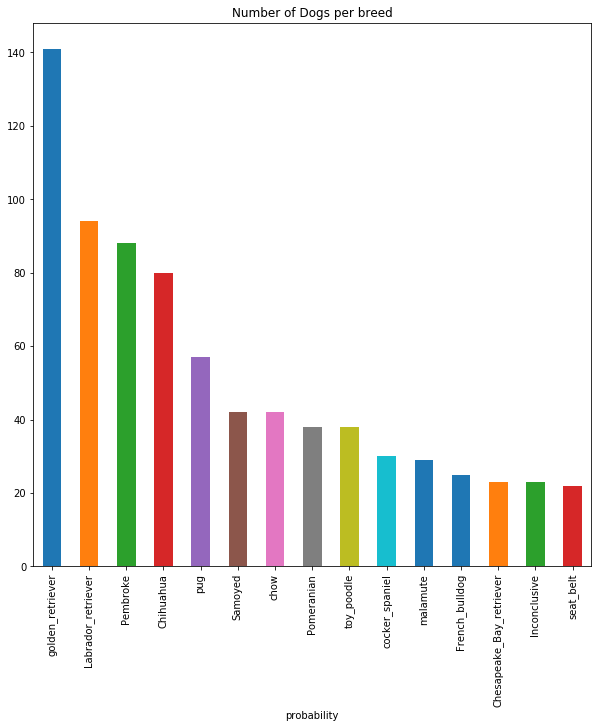

In [108]:
# Visualization : Breed vs Average Rating
import matplotlib.pyplot as plt
% matplotlib inline

tweets.groupby(['probability'])['tweet_id'].count().sort_values(ascending=False)[:15].plot(kind='bar',figsize=(10,10)
                                                                                                  ,title = "Number of Dogs per breed");

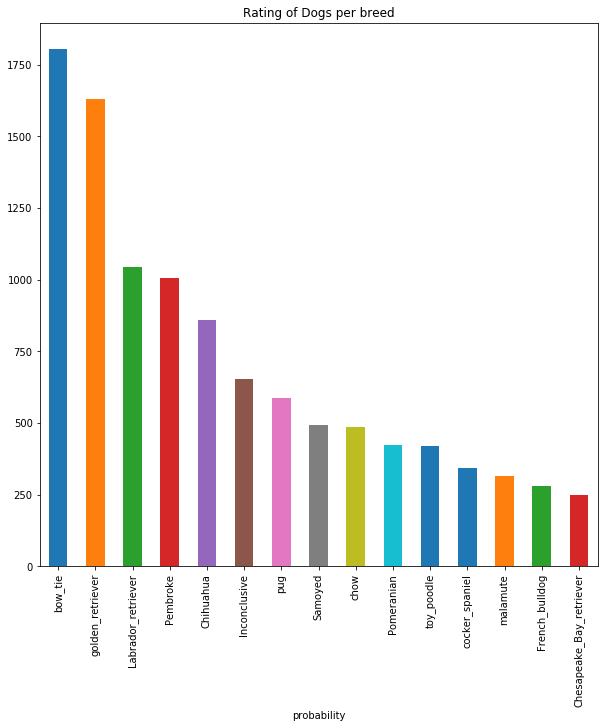

In [109]:
tweets.groupby(['probability'])['rating_numerator'].sum().sort_values(ascending=False)[:15].plot(kind='bar',figsize=(10,10)
                                                                                                ,title = "Rating of Dogs per breed");

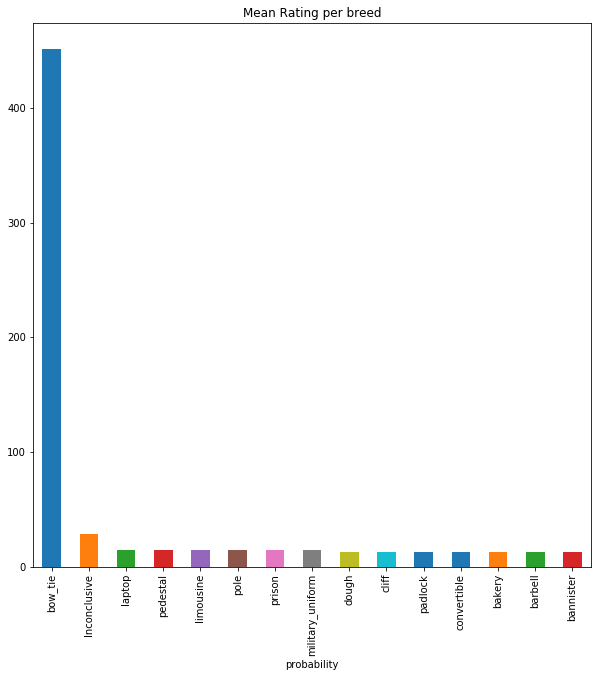

In [110]:
tweets.groupby(['probability'])['rating_numerator'].mean().sort_values(ascending=False)[:15].plot(kind='bar',figsize=(10,10)
                                                                                                 ,title = "Mean Rating per breed");

In [111]:
for text in tweets[tweets.probability=='bow_tie'].text:
    print(text)

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
When the photographer forgets to tell you where to look... 10/10 https://t.co/u1GHWxhC85
This is Archie. He's a Bisquick Taj Mapaw. Too many people are touching him. It is doing him a discomfort. 10/10 https://t.co/CJJpjTMzPQ
This is Damon. The newest presidential candidate for 2016. 10/10 he gets my vote https://t.co/Z5nqlfjYJi


In [112]:
tweets[tweets.probability=='laptop'].squeeze().text

"This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF"